<a href="https://colab.research.google.com/github/donnowhattodo/Deep-Learning-Collab-files/blob/main/YOLOV3run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Object Detection using PyTorch YOLOv3](https://debuggercafe.com/object-detection-using-pytorch-yolov3)
![](https://debuggercafe.com/wp-content/uploads/2021/03/Object-Detection-using-PyTorch-YOLOv3.jpg)

## Notebook Setup

In [1]:
!git clone https://github.com/ultralytics/yolov3.git

Cloning into 'yolov3'...
remote: Enumerating objects: 9985, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9985 (delta 0), reused 3 (delta 0), pack-reused 9980
Receiving objects: 100% (9985/9985), 9.32 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (6730/6730), done.


In [2]:
%cd yolov3

/content/yolov3


In [3]:
import requests
url = "https://drive.google.com/uc?id=1VLVLhSQdRkKLhEohWHiMFMsOJN8sjcSi&export=download"
r = requests.get(url)
with open('input.zip', 'wb') as f:
    f.write(r.content) 

# https://drive.google.com/file/d/1VLVLhSQdRkKLhEohWHiMFMsOJN8sjcSi/view?usp=sharing

In [4]:
!unzip input.zip

Archive:  input.zip
   creating: input/
  inflating: input/image_1.jpg       
  inflating: input/image_2.jpg       
  inflating: input/video_1.mp4       
  inflating: input/video_2.mp4       


In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 5.3 MB/s 
     |████████████████████████████████| 1.7 MB 42.1 MB/s 
     |████████████████████████████████| 144 kB 51.4 MB/s 
     |████████████████████████████████| 181 kB 41.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=12b09626a829f86128f47ef57d0f0c61f8f9ca645fabfb35bcb3a0a1c7e244d5
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
!sh weights/download_weights.sh

sh: 0: Can't open weights/download_weights.sh


In [7]:
import matplotlib.pyplot as plt

from pylab import rcParams

rcParams['figure.figsize'] = 18, 15

## Detections on Images

In [8]:
!python detect.py --source input/image_1.jpg --weights yolov3.pt --project infer_yolov3

detect: weights=['yolov3.pt'], source=input/image_1.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov3, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-11-g9f9e650 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

100% 119M/119M [00:01<00:00, 74.0MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/1 /content/yolov3/input/image_1.jpg: 480x640 1 person, 3 elephants, 1 umbrella, Done. (0.147s)
Speed: 0.5ms pre-process, 146.6ms inference, 38.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov3/exp


In [9]:
!python detect.py --source input/image_1.jpg --weights yolov3-tiny.pt --project infer_yolov3_tiny

detect: weights=['yolov3-tiny.pt'], source=input/image_1.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov3_tiny, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-11-g9f9e650 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

100% 17.0M/17.0M [00:00<00:00, 94.2MB/s]

Fusing layers... 
Model Summary: 48 layers, 8849182 parameters, 0 gradients, 13.2 GFLOPs
image 1/1 /content/yolov3/input/image_1.jpg: 480x640 1 person, 1 elephant, 1 giraffe, 1 umbrella, Done. (0.024s)
Speed: 0.5ms pre-process, 23.5ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov3_tiny/exp


(-0.5, 639.5, 467.5, -0.5)

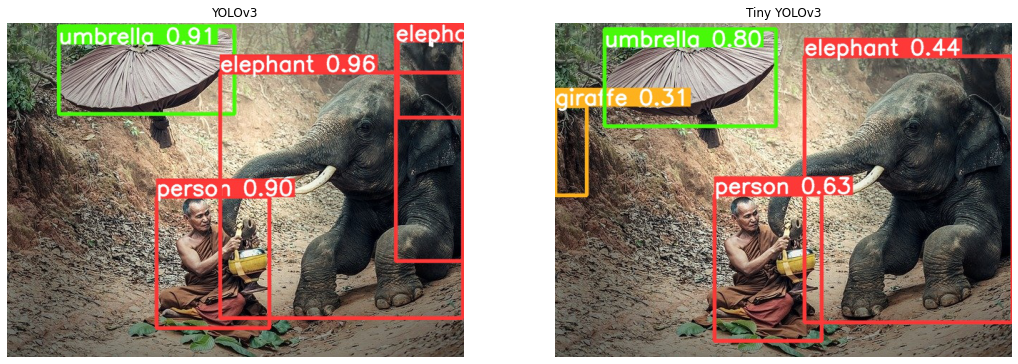

In [10]:
image_1 = plt.imread('/content/yolov3/infer_yolov3/exp/image_1.jpg')
image_2 = plt.imread('/content/yolov3/infer_yolov3_tiny/exp/image_1.jpg')

plt.subplot(121)
plt.imshow(image_1)
plt.title('YOLOv3')
plt.axis('off')
plt.subplot(122)
plt.imshow(image_2)
plt.title('Tiny YOLOv3')
plt.axis('off')

In [11]:
!python detect.py --source input/image_2.jpg --weights yolov3.pt --project infer_yolov3

detect: weights=['yolov3.pt'], source=input/image_2.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov3, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-11-g9f9e650 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/1 /content/yolov3/input/image_2.jpg: 448x640 9 persons, 7 backpacks, 2 handbags, Done. (0.135s)
Speed: 0.5ms pre-process, 134.8ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov3/exp2


In [12]:
!python detect.py --source input/image_2.jpg --weights yolov3-tiny.pt --project infer_yolov3_tiny

detect: weights=['yolov3-tiny.pt'], source=input/image_2.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov3_tiny, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-11-g9f9e650 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 48 layers, 8849182 parameters, 0 gradients, 13.2 GFLOPs
image 1/1 /content/yolov3/input/image_2.jpg: 448x640 9 persons, Done. (0.016s)
Speed: 0.4ms pre-process, 16.4ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to infer_yolov3_tiny/exp2


(-0.5, 639.5, 425.5, -0.5)

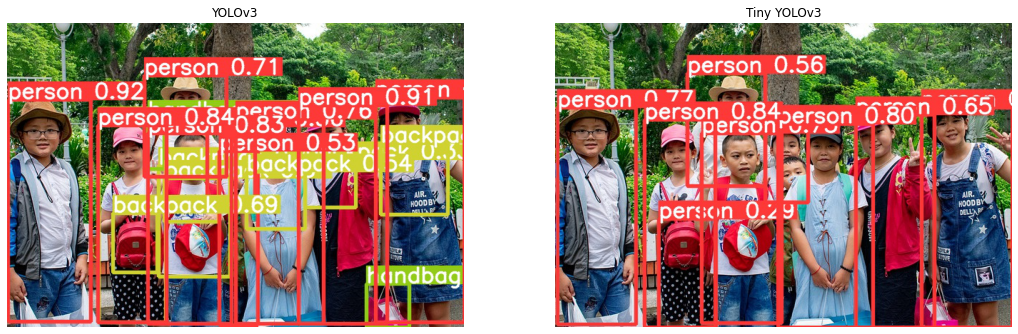

In [13]:
image_1 = plt.imread('/content/yolov3/infer_yolov3/exp2/image_2.jpg')
image_2 = plt.imread('/content/yolov3/infer_yolov3_tiny/exp2/image_2.jpg')

plt.subplot(121)
plt.imshow(image_1)
plt.title('YOLOv3')
plt.axis('off')
plt.subplot(122)
plt.imshow(image_2)
plt.title('Tiny YOLOv3')
plt.axis('off')

## Detections on Videos

### <font color="orange">It is not very suitable to display videos on Colab. After inference, you can easily download them and play on your own systems :)</font>

### Video1 with Normal YOLOv3

In [14]:
!python detect.py --source input/video_1.mp4 --weights yolov3.pt --project infer_yolov3

detect: weights=['yolov3.pt'], source=input/video_1.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov3, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-11-g9f9e650 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
video 1/1 (1/902) /content/yolov3/input/video_1.mp4: 384x640 4 persons, 9 cars, 1 truck, 1 dog, 3 handbags, 1 suitcase, 1 cell phone, Done. (0.127s)
video 1/1 (2/902) /content/yolov3/input/video_1.mp4: 384x640 4 persons, 8 cars, 1 truck, 1 dog, 3 handbags, 1 suitcase, Done. (0.114s)
video 1/1 (3/902) /content/yolov3/input/video_1.mp4: 384x640 4 persons, 8 cars, 1 truck, 1 dog, 3 handbags, 1 suitcase, Done. (0.103

### Video1 with Tiny YOLOv3

In [15]:
!python detect.py --source input/video_1.mp4 --weights yolov3-tiny.pt --project infer_yolov3_tiny

detect: weights=['yolov3-tiny.pt'], source=input/video_1.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov3_tiny, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-11-g9f9e650 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 48 layers, 8849182 parameters, 0 gradients, 13.2 GFLOPs
video 1/1 (1/902) /content/yolov3/input/video_1.mp4: 384x640 4 persons, 5 cars, 1 bus, 1 dog, Done. (0.020s)
video 1/1 (2/902) /content/yolov3/input/video_1.mp4: 384x640 5 persons, 4 cars, 1 bus, Done. (0.018s)
video 1/1 (3/902) /content/yolov3/input/video_1.mp4: 384x640 5 persons, 4 cars, 1 bus, Done. (0.018s)
video 1/1 (4/902) /content/yolov3/input/video_1.mp4: 384x640 5 persons, 4 cars, 1 bus, Done. (0.

### Video2 with Normal YOLOv3

In [16]:
!python detect.py --source input/video_2.mp4 --weights yolov3.pt --project infer_yolov3 

detect: weights=['yolov3.pt'], source=input/video_2.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov3, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-11-g9f9e650 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
video 1/1 (1/265) /content/yolov3/input/video_2.mp4: 384x640 15 persons, 3 skiss, Done. (0.123s)
video 1/1 (2/265) /content/yolov3/input/video_2.mp4: 384x640 14 persons, 3 skiss, Done. (0.112s)
video 1/1 (3/265) /content/yolov3/input/video_2.mp4: 384x640 15 persons, 4 skiss, Done. (0.103s)
video 1/1 (4/265) /content/yolov3/input/video_2.mp4: 384x640 14 persons, 4 skiss, Done. (0.096s)
video 1/1 (5/265) /content/y

### Video2 with Tiny YOLOv3

In [17]:
!python detect.py --source input/video_2.mp4 --weights yolov3-tiny.pt --project infer_yolov3_tiny 

detect: weights=['yolov3-tiny.pt'], source=input/video_2.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=infer_yolov3_tiny, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-11-g9f9e650 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 48 layers, 8849182 parameters, 0 gradients, 13.2 GFLOPs
video 1/1 (1/265) /content/yolov3/input/video_2.mp4: 384x640 8 persons, 2 skiss, Done. (0.020s)
video 1/1 (2/265) /content/yolov3/input/video_2.mp4: 384x640 8 persons, 3 skiss, Done. (0.018s)
video 1/1 (3/265) /content/yolov3/input/video_2.mp4: 384x640 9 persons, 2 skiss, Done. (0.018s)
video 1/1 (4/265) /content/yolov3/input/video_2.mp4: 384x640 9 persons, 2 skiss, Done. (0.018s)
video 1/1 (5/265) /conten

## Zip Every Output Folder and Download Files

In [18]:
!zip -r /content/yolov3/infer_yolov3 infer_yolov3
!zip -r /content/yolov3/infer_yolov3_tiny infer_yolov3_tiny

  adding: infer_yolov3/ (stored 0%)
  adding: infer_yolov3/exp4/ (stored 0%)
  adding: infer_yolov3/exp4/video_2.mp4 (deflated 2%)
  adding: infer_yolov3/exp3/ (stored 0%)
  adding: infer_yolov3/exp3/video_1.mp4 (deflated 2%)
  adding: infer_yolov3/exp2/ (stored 0%)
  adding: infer_yolov3/exp2/image_2.jpg (deflated 1%)
  adding: infer_yolov3/exp/ (stored 0%)
  adding: infer_yolov3/exp/image_1.jpg (deflated 2%)
  adding: infer_yolov3_tiny/ (stored 0%)
  adding: infer_yolov3_tiny/exp4/ (stored 0%)
  adding: infer_yolov3_tiny/exp4/video_2.mp4 (deflated 2%)
  adding: infer_yolov3_tiny/exp3/ (stored 0%)
  adding: infer_yolov3_tiny/exp3/video_1.mp4 (deflated 2%)
  adding: infer_yolov3_tiny/exp2/ (stored 0%)
  adding: infer_yolov3_tiny/exp2/image_2.jpg (deflated 1%)
  adding: infer_yolov3_tiny/exp/ (stored 0%)
  adding: infer_yolov3_tiny/exp/image_1.jpg (deflated 2%)


In [19]:
from google.colab import files

files.download('/content/yolov3/infer_yolov3.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
files.download('/content/yolov3/infer_yolov3_tiny.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>